<a href="https://colab.research.google.com/github/kalakal/ADO.net-EmployeePayroll-Service/blob/master/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

zip_file_path = '/content/archive.zip'  # Replace with the correct path if needed

# Check if the file exists and is a zip file
if os.path.exists(zip_file_path):
    print("File exists.")
    try:
        # Open the zip file in 'read' mode for extraction
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            print("This is a valid zip file.")
            # Create the extraction directory if it doesn't exist
            extraction_path = '/content/dataset'
            os.makedirs(extraction_path, exist_ok=True)
            # Extract all contents to the specified directory
            zip_ref.extractall(extraction_path)
            print("Extracted files:", os.listdir(extraction_path))
    except zipfile.BadZipFile:
        print("This file is not a zip file or it is corrupted.")
    except (OSError, IOError) as e:
        print(f"An error occurred during extraction: {e}")
else:
    print("File does not exist.")

File exists.
This is a valid zip file.
Extracted files: ['data.yaml', 'valid', 'README.roboflow.txt', 'train']


In [ ]:
import glob
import cv2
from PIL import Image
import yaml

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 33.0 MB/s eta 0:00:00


In [ ]:
import torch
import os
from IPython.display import Image, clear_output # to display images


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml').load('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 242MB/s]

Transferred 319/391 items from pretrained weights


In [ ]:
image_list=glob.glob("/content/dataset/train/images/*")
img=cv2.imread(image_list[0])
img_shape=img.shape
img_shape
dataset_location="/content/dataset/data.yaml"

In [ ]:
image_list=glob.glob("/content/dataset/train/images/*")
img=cv2.imread(image_list[0])
img_shape=img.shape
model.train(data="/content/dataset/data.yaml",epochs=10,imgsz=640,device='cpu')

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 87.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 2067 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2067/2067 [00:01<00:00, 1285.16it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 2587.28it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G       1.89      3.059      2.059          8        640: 100%|██████████| 130/130 [25:32<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

                   all         16         25      0.561        0.4      0.437      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.906      2.522      2.094         10        640: 100%|██████████| 130/130 [25:18<00:00, 11.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         16         25      0.196      0.283      0.185     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.859       2.23       2.04          5        640: 100%|██████████| 130/130 [25:15<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]

                   all         16         25       0.52       0.28      0.364     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.836      2.105      2.034          5        640: 100%|██████████| 130/130 [25:14<00:00, 11.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.93s/it]

                   all         16         25      0.476       0.32      0.324      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.759      1.933      1.946         11        640: 100%|██████████| 130/130 [24:59<00:00, 11.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]

                   all         16         25      0.778        0.4      0.521      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.701      1.821      1.904          3        640: 100%|██████████| 130/130 [25:10<00:00, 11.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.90s/it]

                   all         16         25      0.853      0.466      0.638      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.684      1.732      1.886          5        640: 100%|██████████| 130/130 [25:19<00:00, 11.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.75s/it]

                   all         16         25      0.781       0.57      0.716      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G       1.63      1.622      1.834          4        640: 100%|██████████| 130/130 [25:16<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.73s/it]

                   all         16         25       0.96       0.72      0.766      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.586      1.527      1.791          9        640: 100%|██████████| 130/130 [25:18<00:00, 11.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]

                   all         16         25      0.837       0.72      0.769      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.542      1.422      1.743          4        640: 100%|██████████| 130/130 [25:11<00:00, 11.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.21s/it]

                   all         16         25      0.809      0.679      0.801      0.302



10 epochs completed in 4.226 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]


                   all         16         25      0.837       0.72      0.769      0.362
Speed: 2.3ms preprocess, 198.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7935961b5540>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


0: 640x640 1 pothole, 589.4ms
Speed: 15.1ms preprocess, 589.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


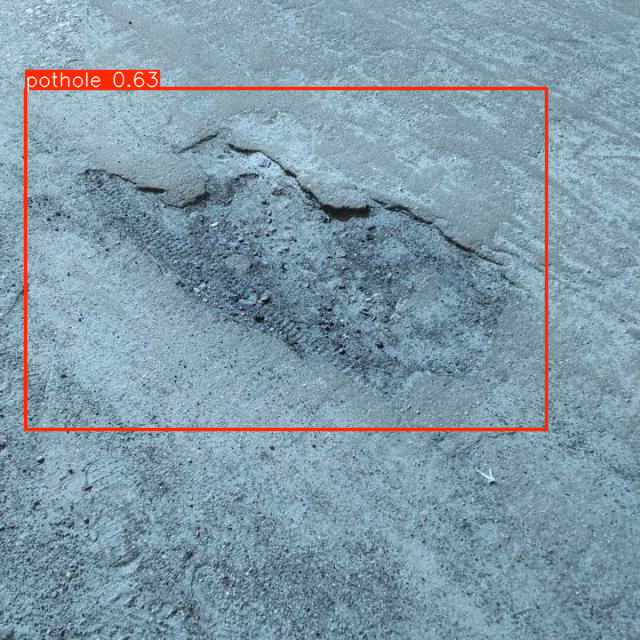

In [ ]:
from PIL import Image
result=model(["/content/dataset/valid/images/552_jpg.rf.47c9daa4474beee1ebaaa8979a76abae.jpg"],stream=False)
res=result[0].plot()
Image.fromarray(res)

In [ ]:
model.export(format="onnx")

NameError: name 'model' is not defined

In [ ]:
import pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
from PIL import Image
results=model(["/content/dataset/valid/images/13_jpg.rf.34885bb42e4ba1f9116aa9e124c95f82.jpg"],sparse=False)
res=results[0].plot()
Image.fromarray(res)

TypeError: 'collections.OrderedDict' object is not callable